In [1]:
#loaded necessary imports
from dotenv import load_dotenv
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import datetime as dt
import seaborn as sns
import requests
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
import panel as pn
pn.extension('plotly')
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from matplotlib.pylab import date2num

# Pulling Data From Yahoo Finance API

In [2]:
#extracting data from Yahoo Finance API
tickers = ['BTC-USD','ETH-USD', 'XRP-USD']
all_data = pd.DataFrame()
test_data = pd.DataFrame()
no_data = []

for i in tickers:
    try:
        test_data = pdr.get_data_yahoo(i, start = dt.datetime(2010,1,1), end = dt.date.today())
        test_data['symbol'] = i
        all_data = all_data.append(test_data)
    except:
        no_data.append(i)

In [3]:
#Creating Return column
all_data['return'] = all_data.groupby('symbol')['Close'].pct_change() 

In [4]:
#Checking for NaNs
all_data.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
symbol       0
return       3
dtype: int64

In [5]:
#Removing NaNs
all_data = all_data.dropna()

In [6]:
#Rechecking for NaNs
all_data.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
symbol       0
return       0
dtype: int64

In [7]:
#Seperating data by tickers
btc_data = all_data.loc[all_data['symbol'] == 'BTC-USD']
eth_data = all_data.loc[all_data['symbol'] == 'ETH-USD']
xrp_data = all_data.loc[all_data['symbol'] == 'XRP-USD']

In [8]:
#Showing Data
btc_data

High           Low          Open         Close  \
Date                                                                 
2014-09-17    456.859985    413.104004    456.859985    424.440002   
2014-09-18    427.834991    384.532013    424.102997    394.795990   
2014-09-19    423.295990    389.882996    394.673004    408.903992   
2014-09-20    412.425995    393.181000    408.084991    398.821014   
2014-09-21    406.915985    397.130005    399.100006    402.152008   
...                  ...           ...           ...           ...   
2021-07-16  31935.945312  31223.990234  31397.308594  31533.068359   
2021-07-17  32398.996094  31215.492188  31533.884766  31796.810547   
2021-07-18  31885.859375  30563.734375  31800.011719  30817.832031   
2021-07-19  31006.187500  29360.955078  30838.285156  29807.347656   
2021-07-22  32327.644531  31985.687500  31985.687500  32132.337891   

                  Volume     Adj Close   symbol    return  
Date                                                       
2014-09-17  3.448320e+07    424.440002  BTC-USD -0.071926  
2014-09-18  3.791970e+07    394.795990  BTC-USD -0.069843  
2014-09-19  3.686360e+07    408.903992  BTC-USD  0.035735  
2014-09-20  2.658010e+07    398.821014  BTC-USD -0.024659  
2014-09-21  2.412760e+07    402.152008  BTC-USD  0.008352  
...                  ...           ...      ...       ...  
2021-07-16  1.889502e+10  31533.068359  BTC-USD  0.003549  
2021-07-17  1.878799e+10  31796.810547  BTC-USD  0.008364  
2021-07-18  2.043479e+10  30817.832031  BTC-USD -0.030789  
2021-07-19  2.314827e+10  29807.347656  BTC-USD -0.032789  
2021-07-22  2.849531e+10  32132.337891  BTC-USD  0.078001  

[2495 rows x 8 columns]

In [9]:
eth_data

High          Low         Open        Close        Volume  \
Date                                                                           
2015-08-07     2.798810     0.714725     2.793760     0.753325  6.741880e+05   
2015-08-08     0.879810     0.629191     0.706136     0.701897  5.321700e+05   
2015-08-09     0.729854     0.636546     0.713989     0.708448  4.052830e+05   
2015-08-10     1.131410     0.663235     0.708087     1.067860  1.463100e+06   
2015-08-11     1.289940     0.883608     1.058750     1.217440  2.150620e+06   
...                 ...          ...          ...          ...           ...   
2021-07-16  1917.597900  1855.590820  1876.881348  1898.825195  1.336428e+10   
2021-07-17  1988.336426  1883.012573  1900.194336  1895.552124  1.379187e+10   
2021-07-18  1916.118042  1807.909912  1893.053589  1817.296631  1.415774e+10   
2021-07-19  1836.998047  1722.050781  1819.082031  1787.510742  1.736860e+10   
2021-07-22  2017.443848  1989.811279  1989.811279  1998.697998  2.187529e+10   

              Adj Close   symbol    return  
Date                                        
2015-08-07     0.753325  ETH-USD -0.728250  
2015-08-08     0.701897  ETH-USD -0.068268  
2015-08-09     0.708448  ETH-USD  0.009333  
2015-08-10     1.067860  ETH-USD  0.507323  
2015-08-11     1.217440  ETH-USD  0.140075  
...                 ...      ...       ...  
2021-07-16  1898.825195  ETH-USD  0.009808  
2021-07-17  1895.552124  ETH-USD -0.001724  
2021-07-18  1817.296631  ETH-USD -0.041284  
2021-07-19  1787.510742  ETH-USD -0.016390  
2021-07-22  1998.697998  ETH-USD  0.118146  

[2171 rows x 8 columns]

In [10]:
xrp_data

High       Low      Open     Close        Volume  Adj Close  \
Date                                                                          
2014-09-17  0.005521  0.005091  0.005398  0.005135  4.911470e+05   0.005135   
2014-09-18  0.005167  0.004873  0.005134  0.004942  4.071090e+05   0.004942   
2014-09-19  0.004954  0.004736  0.004942  0.004772  3.226210e+05   0.004772   
2014-09-20  0.004791  0.004540  0.004768  0.004570  3.095710e+05   0.004570   
2014-09-21  0.004670  0.004532  0.004561  0.004657  2.673420e+05   0.004657   
...              ...       ...       ...       ...           ...        ...   
2021-07-16  0.597719  0.573239  0.589494  0.582428  1.796242e+09   0.582428   
2021-07-17  0.601203  0.573422  0.582593  0.587922  1.567539e+09   0.587922   
2021-07-18  0.589353  0.555178  0.587225  0.557556  1.706407e+09   0.557556   
2021-07-19  0.568373  0.517910  0.557622  0.529336  2.026435e+09   0.529336   
2021-07-22  0.576758  0.569318  0.569318  0.571196  2.656877e+09   0.571196   

             symbol    return  
Date                           
2014-09-17  XRP-USD -0.048898  
2014-09-18  XRP-USD -0.037585  
2014-09-19  XRP-USD -0.034399  
2014-09-20  XRP-USD -0.042330  
2014-09-21  XRP-USD  0.019037  
...             ...       ...  
2021-07-16  XRP-USD -0.014127  
2021-07-17  XRP-USD  0.009433  
2021-07-18  XRP-USD -0.051650  
2021-07-19  XRP-USD -0.050614  
2021-07-22  XRP-USD  0.079079  

[2495 rows x 8 columns]

# Calculating RSI

In [11]:
#RSI FUNCTION
#30 and below is underbought, 70 and above is overbought
#https://www.roelpeters.be/many-ways-to-calculate-the-rsi-in-python-pandas/
def rsi(df, periods = 14, ema = True):
    """
    Returns a pd.Series with the relative strength index.
    """
    close_delta = df['Close'].diff()

    # Make two series: one for lower closes and one for higher closes
    up = close_delta.clip(lower=0)
    down = -1 * close_delta.clip(upper=0)
    
    if ema == True:
	    # Use exponential moving average
        ma_up = up.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
        ma_down = down.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
    else:
        # Use simple moving average
        ma_up = up.rolling(window = periods, adjust=False).mean()
        ma_down = down.rolling(window = periods, adjust=False).mean()
        
    rsi = ma_up / ma_down
    rsi = 100 - (100/(1 + rsi))
    return rsi

In [12]:
#Calculating RSI for BTC
btc_rsi = rsi(btc_data, periods=14, ema=True)

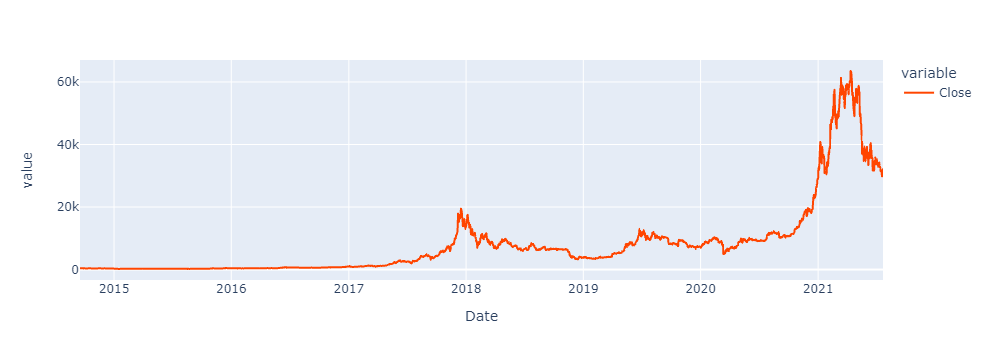

In [13]:
#Showing plot BTC
fig = px.line(btc_data['Close'])
fig.update_traces(line_color='#FF4500')
fig.show()

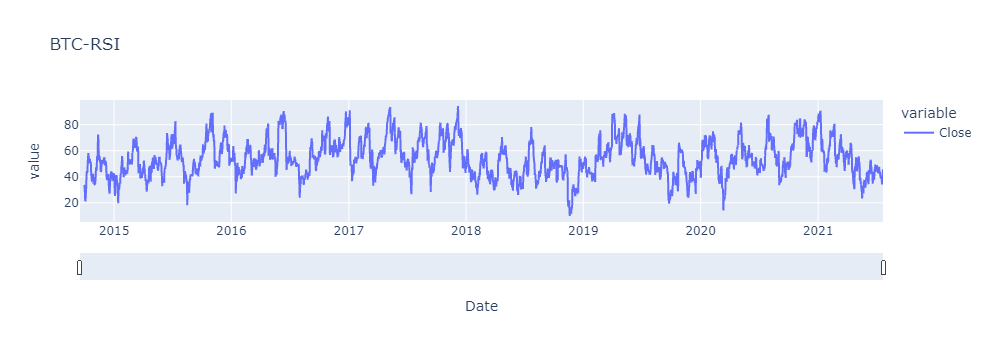

In [14]:
fig2 = px.line(btc_rsi, title='BTC-RSI')
fig2.update_xaxes(rangeslider_visible=True)
fig2.show()

In [15]:
#Calculating RSI for BTC
eth_rsi = rsi(eth_data, periods=14, ema=True)

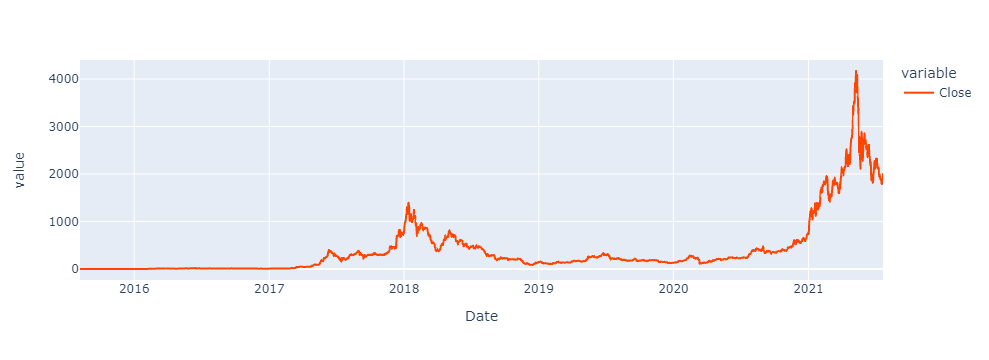

In [16]:
#Showing plot ETH
fig = px.line(eth_data['Close'])
fig.update_traces(line_color='#FF4500')
fig.show()

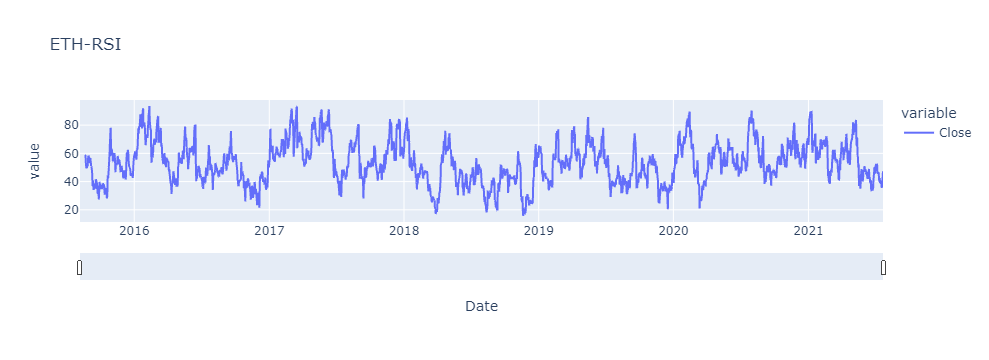

In [17]:
fig2 = px.line(eth_rsi, title='ETH-RSI')
fig2.update_xaxes(rangeslider_visible=True)
fig2.show()

In [18]:
#Calculating RSI for XRP
xrp_rsi = rsi(xrp_data, periods=14, ema=True)

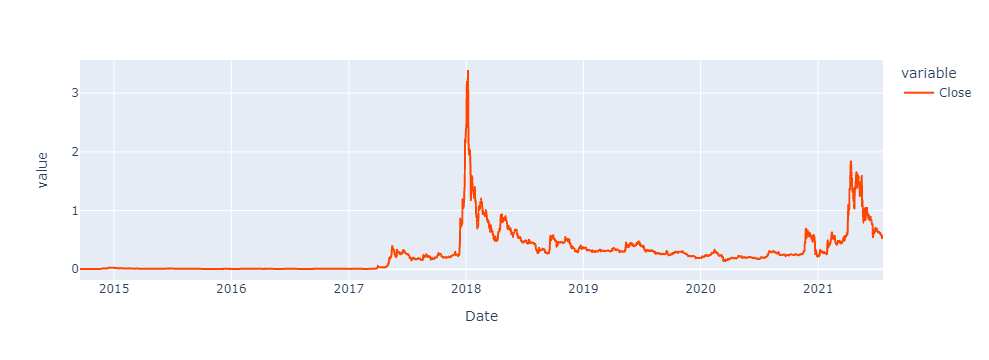

In [19]:
#Showing plot ETH
fig = px.line(xrp_data['Close'])
fig.update_traces(line_color='#FF4500')
fig.show()

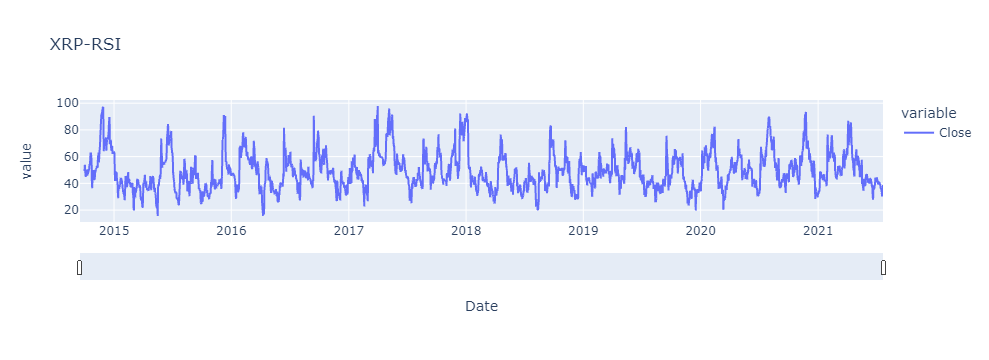

In [20]:
fig2 = px.line(xrp_rsi,title='XRP-RSI')
fig2.update_xaxes(rangeslider_visible=True)
fig2.show()

# Calculating MACD

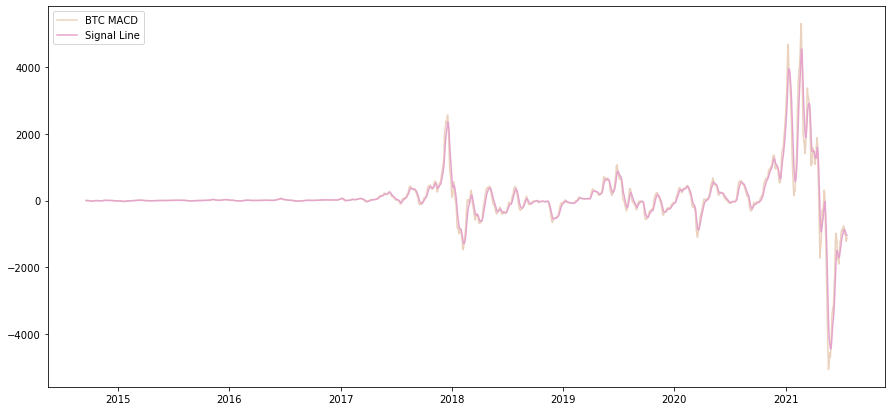

In [21]:
#Moving Average Convergence Divergence MACD, consists of MACD line and signal line
#Calculationg MACD for BTC
#btc_data = btc_data[365:465]
exp1 = btc_data['Close'].ewm(span=12, adjust=False).mean()
exp2 = btc_data['Close'].ewm(span=26, adjust=False).mean()

btc_macd = exp1-exp2
btc_exp3 = btc_macd.ewm(span=9, adjust=False).mean()


plt.figure(figsize=(15,7))
plt.plot(btc_data.index, btc_macd, label='BTC MACD', color = '#EBD2BE')
plt.plot(btc_data.index, btc_exp3, label='Signal Line', color='#E5A4CB')
plt.legend(loc='upper left')
plt.show()

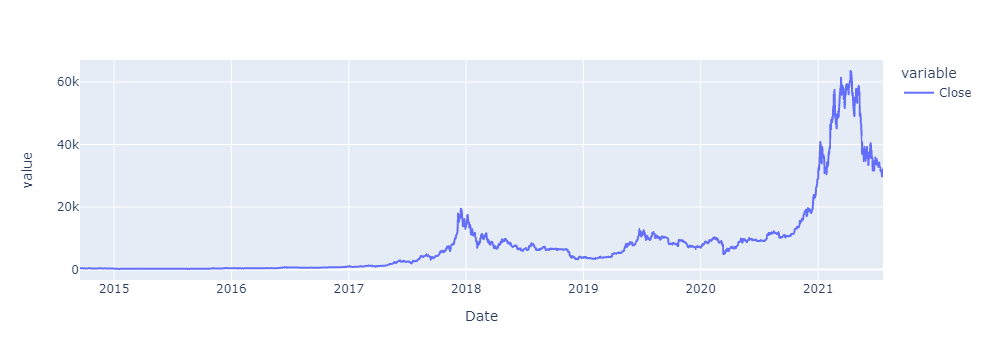

In [22]:
#Showing plot BTC
fig = px.line(btc_data['Close'])
fig.show()

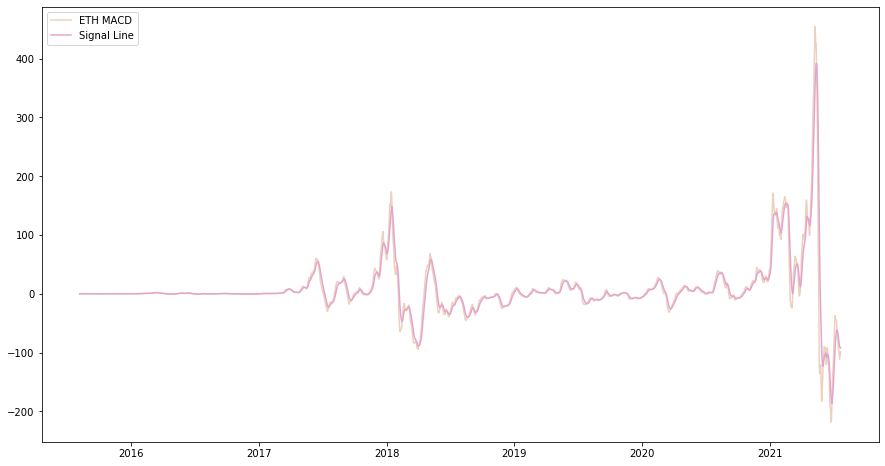

In [23]:
#Calculationg MACD for ETH
#eth_data = eth_data[800:1000]
exp1 = eth_data['Close'].ewm(span=12, adjust=False).mean()
exp2 = eth_data['Close'].ewm(span=26, adjust=False).mean()

eth_macd = exp1-exp2
eth_exp3 = eth_macd.ewm(span=9, adjust=False).mean()


plt.figure(figsize=(15,8))
plt.plot(eth_data.index, eth_macd, label='ETH MACD', color = '#EBD2BE')
plt.plot(eth_data.index, eth_exp3, label='Signal Line', color='#E5A4CB')
plt.legend(loc='upper left')
plt.show()

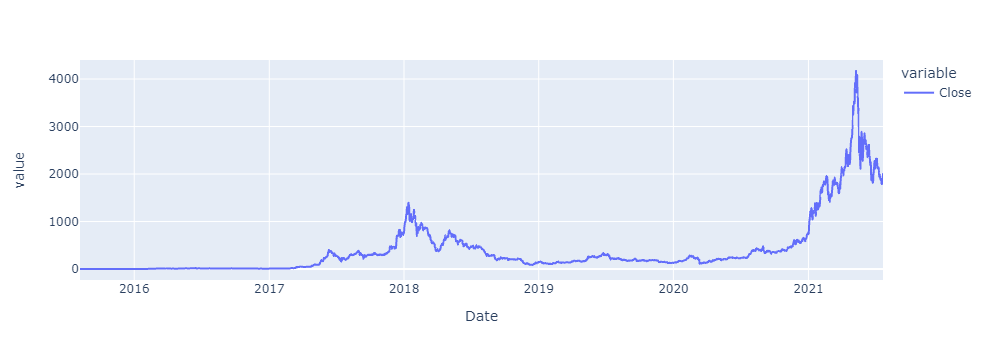

In [24]:
#Showing plot ETH
fig = px.line(eth_data['Close'])
fig.show()

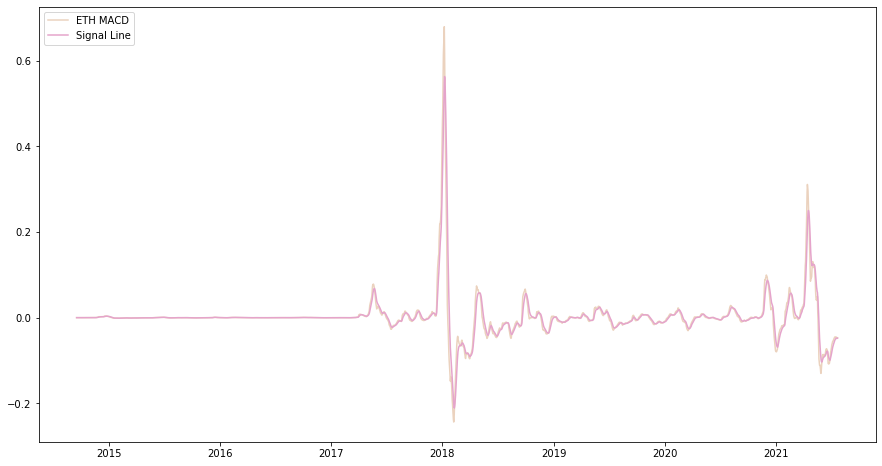

In [25]:
#Calculationg MACD for XRP
#xrp_data = xrp_data[800:1000]
exp1 = xrp_data['Close'].ewm(span=12, adjust=False).mean()
exp2 = xrp_data['Close'].ewm(span=26, adjust=False).mean()

xrp_macd = exp1-exp2
xrp_exp3 = xrp_macd.ewm(span=9, adjust=False).mean()


plt.figure(figsize=(15,8))
plt.plot(xrp_data.index, xrp_macd, label='ETH MACD', color = '#EBD2BE')
plt.plot(xrp_data.index, xrp_exp3, label='Signal Line', color='#E5A4CB')
plt.legend(loc='upper left')
plt.show()

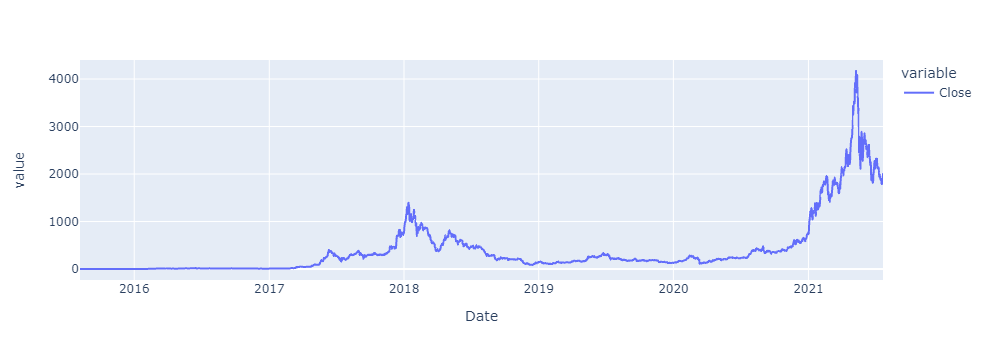

In [26]:
#Showing plot XRP
fig = px.line(eth_data['Close'])
fig.show()

# Bollinger Bands

In [27]:
#Bollinger Bands for BTC
#Bollinger Bands simply add and subtract a standard deviation calculation.
#Standard deviation is a mathematical formula that measures volatility, showing how the stock price can vary from its true value

#btc_data = btc_data[750:900]

btc_data_15MA = btc_data['Close'].transform(lambda x: x.rolling(window=15).mean())
btc_data_SD = btc_data['Close'].transform(lambda x: x.rolling(window=15).std())
btc_data_upperband = btc_data_15MA + 2*btc_data_SD
btc_data_lowerband = btc_data_15MA - 2*btc_data_SD

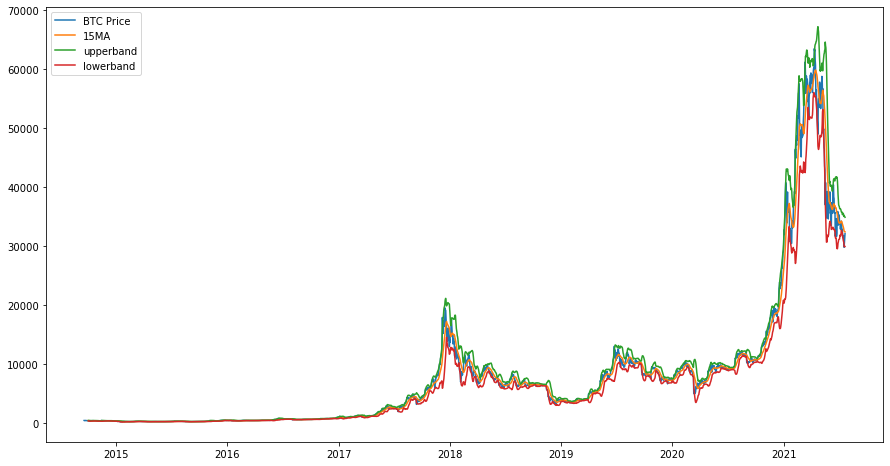

In [28]:
plt.figure(figsize=(15,8))
plt.plot(btc_data.index, btc_data['Close'], label='BTC Price')
plt.plot(btc_data_15MA, label='15MA')
plt.plot(btc_data_upperband, label='upperband')
plt.plot(btc_data_lowerband, label='lowerband')
plt.legend(loc='upper left')
plt.show()

In [29]:
#Bollinger Bands for ETH
#eth_data = eth_data[1000:1350]

eth_data_15MA = eth_data['Close'].transform(lambda x: x.rolling(window=15).mean())
eth_data_SD = eth_data['Close'].transform(lambda x: x.rolling(window=15).std())
eth_data_upperband = eth_data_15MA + 2*eth_data_SD
eth_data_lowerband = eth_data_15MA - 2*eth_data_SD

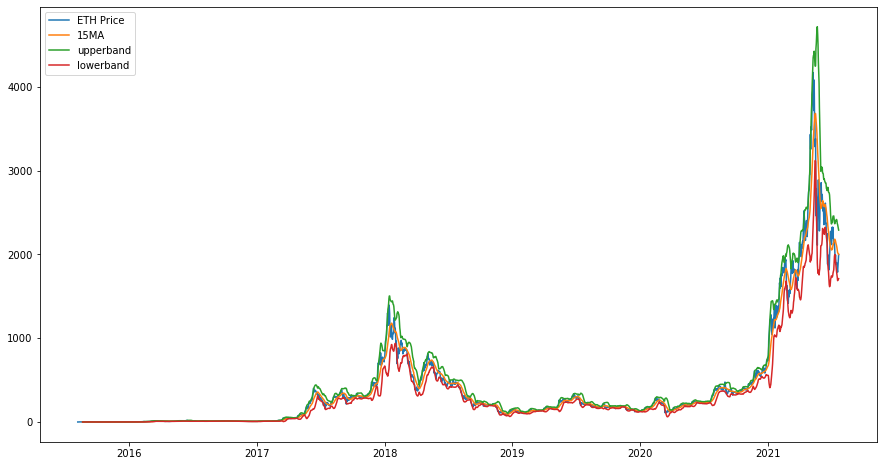

In [30]:
plt.figure(figsize=(15,8))
plt.plot(eth_data.index, eth_data['Close'], label='ETH Price')
plt.plot(eth_data_15MA, label='15MA')
plt.plot(eth_data_upperband, label='upperband')
plt.plot(eth_data_lowerband, label='lowerband')
plt.legend(loc='upper left')
plt.show()

In [31]:
#Bollinger Bands for XRP
#xrp_data = xrp_data[1400:1600]

xrp_data_15MA = xrp_data['Close'].transform(lambda x: x.rolling(window=15).mean())
xrp_data_SD = xrp_data['Close'].transform(lambda x: x.rolling(window=15).std())
xrp_data_upperband = xrp_data_15MA + 2*xrp_data_SD
xrp_data_lowerband = xrp_data_15MA - 2*xrp_data_SD

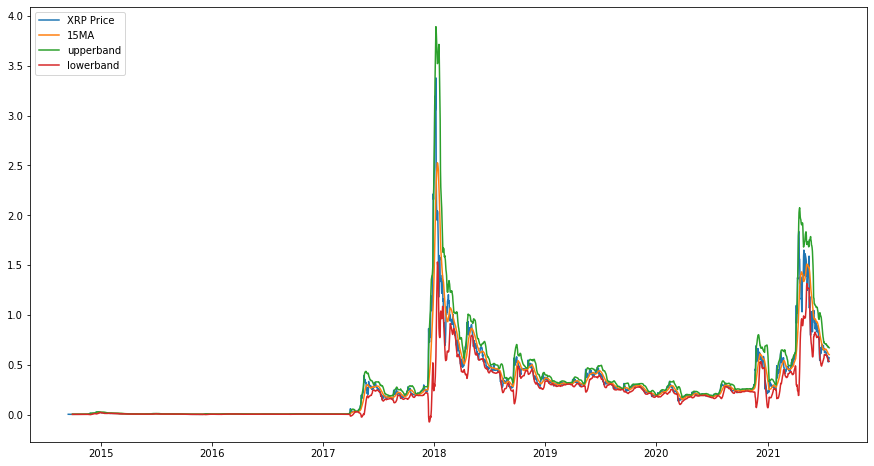

In [32]:
plt.figure(figsize=(15,8))
plt.plot(xrp_data.index, xrp_data['Close'], label='XRP Price')
plt.plot(xrp_data_15MA, label='15MA')
plt.plot(xrp_data_upperband, label='upperband')
plt.plot(xrp_data_lowerband, label='lowerband')
plt.legend(loc='upper left')
plt.show()